In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# df = pd.read_csv('best_results/ensemble_3_best_average_best.csv')
df = pd.read_csv('best_results/ensemble_average_best.csv')
df = df[df['folder_name'].str.contains('DA2')]
# df = df[~df['folder_name'].str.contains('DA0')]
# df = df[~df['folder_name'].str.contains('DA4')]
df = df[~df['folder_name'].str.contains('moredata')]
df = df[~df['folder_name'].str.contains('CLAHE')]
# df = df[~df['folder_name'].str.contains('train_classifier_only')]
# df = df[(df['folder_name'] == 'noDA_noPP_2') | 
#         (df['folder_name'] == 'DA2_dull_razor_shades_of_gray_cropped_images_folder') | 
#         (df['folder_name'] == 'DA2_dull_razor_shades_of_gray_cropped_images_folder_moredata') | 
#         (df['folder_name'] == 'DA2_noPP_2') |
#         (df['folder_name'] == 'dull_razor_shades_of_gray_2')]
df = df.sort_values(by=['balanced_accuracy'], ascending=False)
df = df[['folder_name','balanced_accuracy']]
print(df)

                                          folder_name  balanced_accuracy
2   DA2_dull_razor_shades_of_gray_cropped_images_f...           0.806420
5   DA2_cropped_images_folder_150_epochs_lr_init_0001           0.800657
15  DA2_shades_of_gray_cropped_images_folder_150_e...           0.790381
4                                          DA2_noPP_2           0.781064


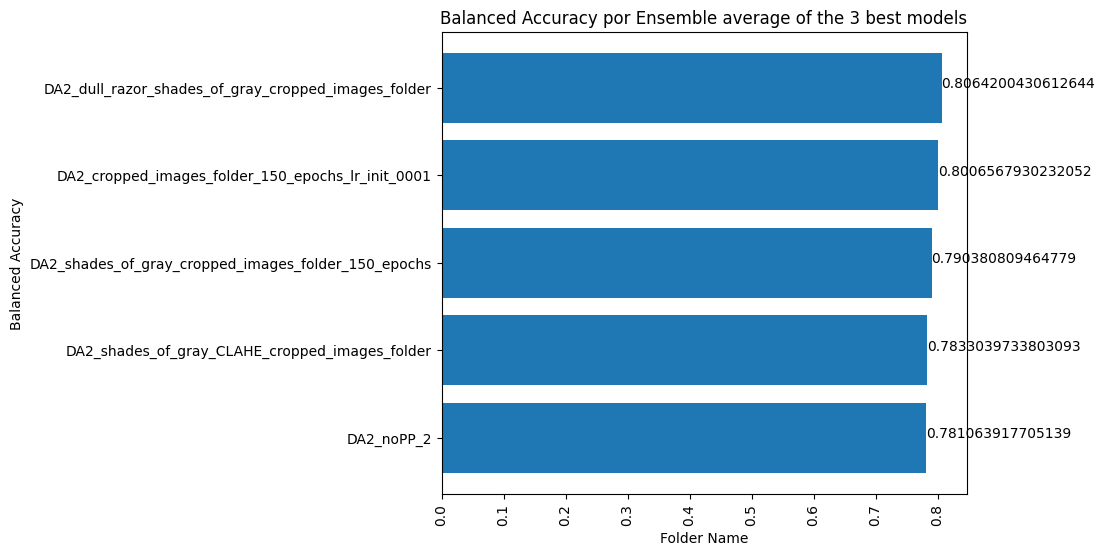

In [4]:
df.sort_values(by=['balanced_accuracy'], ascending=True, inplace=True)
folder_names = df['folder_name'].values
balanced_accuracy = df['balanced_accuracy'].values

plt.figure(figsize=(14, 6))
plt.barh(folder_names, balanced_accuracy)
plt.xticks(rotation=90)
# adjust right border
plt.subplots_adjust(right=.5)
for index, value in enumerate(balanced_accuracy):
    plt.text(value, index, str(value))
    
plt.xlabel('Folder Name')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy por Ensemble average of the 3 best models')
plt.show()

In [36]:
ensembles = ['best_results/ensemble_3_best_average_best.csv', 'best_results/ensemble_average_best.csv', 'best_results/ensemble_voting_best.csv']

all_metrics = None

for ensemble in ensembles:
    df = pd.read_csv(ensemble)
    df = df[df['folder_name'].str.contains('DA2')]
    df = df[~df['folder_name'].str.contains('moredata')]
    df = df[~df['folder_name'].str.contains('CLAHE')]
    
    df = df.sort_values(by=['folder_name'], ascending=False)
    df = df[['folder_name','balanced_accuracy']]
    df = df.rename(columns={'balanced_accuracy': ensemble})
    if all_metrics is None:
        all_metrics = df
    else:
        all_metrics = pd.merge(all_metrics, df, on='folder_name')

all_metrics = all_metrics.T
all_metrics = all_metrics.rename(columns=all_metrics.iloc[0])
all_metrics = all_metrics.drop(all_metrics.index[0])
all_metrics.reset_index(inplace=True)
all_metrics = all_metrics.rename(columns={
    'DA2_shades_of_gray_cropped_images_folder_150_epochs' : "DA - BD",
    'DA2_noPP_2' : "DA",
       'DA2_dull_razor_shades_of_gray_cropped_images_folder' : "DA - BCD",
       'DA2_cropped_images_folder_150_epochs_lr_init_0001' : "DA - D",
       'index': 'ensemble'
})
# all_metrics = all_metrics.reset_index()
all_metrics = all_metrics[['ensemble','DA', 'DA - D', 'DA - BD', 'DA - BCD']]

all_metrics.round(decimals = 4)
all_metrics.to_csv('best_results/results_all_experiments_DA_ensemble.csv', index=False)